In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree, preprocessing
import sklearn.ensemble as ske

In [2]:
df = pd.read_csv('titanic.csv', index_col=None,na_values=['NA'])

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df['Survived'].mean()

0.3838383838383838

In [5]:
df.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [6]:
class_gender_group = df.groupby(['Pclass', 'Sex']).mean()

In [7]:
class_gender_group

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

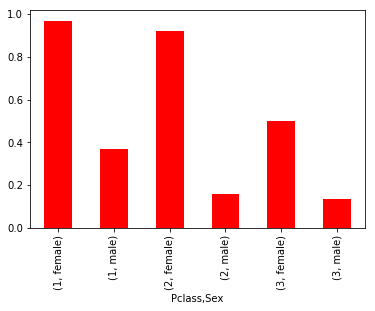

In [8]:
class_gender_group['Survived'].plot.bar(color='Red')

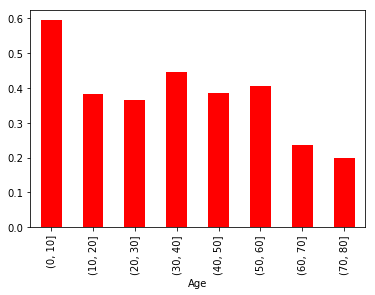

In [9]:
group_by_age = pd.cut(df['Age'], np.arange(0,90,10))
age_group = df.groupby(group_by_age).mean()
age_group['Survived'].plot.bar(color='Red')

In [10]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [11]:
df = df.drop(['Cabin'], axis=1)

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
df = df.dropna()

In [14]:
df.count()

PassengerId    712
Survived       712
Pclass         712
Name           712
Sex            712
Age            712
SibSp          712
Parch          712
Ticket         712
Fare           712
Embarked       712
dtype: int64

In [15]:
def preprocess_df(df):
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()
    processed_df.Sex = le.fit_transform(processed_df.Sex)
    processed_df.Embarked = le.fit_transform(processed_df.Embarked)
    processed_df = processed_df.drop(['Name', 'Ticket'],axis=1)
    return processed_df

In [16]:
processed_df = preprocess_df(df)

In [17]:
X = processed_df.drop(['Survived'], axis=1).values
y = processed_df['Survived'].values

In [18]:
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
clf = tree.DecisionTreeClassifier(max_depth=10)

In [63]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.75524475524475521

In [21]:
ranfor = ske.RandomForestClassifier(n_estimators=50)

In [65]:
ranfor.fit(X_train, y_train)
ranfor.score(X_test, y_test)

0.76923076923076927

In [35]:
test_df = pd.read_csv('test.csv', index_col=None, na_values=['NA'])

In [36]:
pr_test_df = preprocess_df(test_df)
pr_test_df.count()

PassengerId    418
Pclass         418
Sex            418
Age            332
SibSp          418
Parch          418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [37]:
pr_test_df.drop(['Cabin'], axis=1)
pr_test_df['Age'] = pr_test_df['Age'].fillna(pr_test_df['Age'].mean())

In [38]:
pr_test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,1,34.5,0,0,7.8292,NaN,1
1,893,3,0,47.0,1,0,7.0000,NaN,2
2,894,2,1,62.0,0,0,9.6875,NaN,1
3,895,3,1,27.0,0,0,8.6625,NaN,2
4,896,3,0,22.0,1,1,12.2875,NaN,2


In [39]:
pr_test_df['Survived'] = pd.Series(dtype=int, index=pr_test_df.index)

In [40]:
pr_test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,892,3,1,34.5,0,0,7.8292,NaN,1,NaN
1,893,3,0,47.0,1,0,7.0000,NaN,2,NaN
2,894,2,1,62.0,0,0,9.6875,NaN,1,NaN
3,895,3,1,27.0,0,0,8.6625,NaN,2,NaN
4,896,3,0,22.0,1,1,12.2875,NaN,2,NaN


In [53]:
pr_test_df = pr_test_df.drop(['Cabin'], axis=1)

In [54]:
pr_test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,1,34.5,0,0,7.8292,1,0.0
1,893,3,0,47.0,1,0,7.0000,2,0.0
2,894,2,1,62.0,0,0,9.6875,1,0.0
3,895,3,1,27.0,0,0,8.6625,2,0.0
4,896,3,0,22.0,1,1,12.2875,2,0.0


In [48]:
pr_test_df['Survived'] = pr_test_df['Survived'].fillna(0)

In [57]:
pr_test_df.isnull().values.any()

True

In [60]:
pr_test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Survived       0
dtype: int64

In [59]:
pr_test_df['Fare'] = pr_test_df['Fare'].fillna(pr_test_df['Fare'].mean())

In [61]:
test_features = pr_test_df[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked', 'Survived']].values
pred = ranfor.predict(test_features)

In [62]:
#Using Tree Classifier
ids = pr_test_df['PassengerId']
predictions = clf.predict(pr_test_df.drop('PassengerId', axis=1))


output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('titanic-clf.csv', index = False)

In [66]:
# Using Random Forests
ids = pr_test_df['PassengerId']
#predictions = clf.predict(pr_test_df.drop('PassengerId', axis=1))
pred = ranfor.predict(test_features)

output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': pred })
output.to_csv('titanic-ranfor.csv', index = False)

In [67]:
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
